In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Put dataset together

In [11]:
#only using 2019 data just for the month
jan19=pd.read_csv('/Users/galvanize/Downloads/jan19.csv')
feb19=pd.read_csv('/Users/galvanize/Downloads/feb19.csv')
mar19=pd.read_csv('/Users/galvanize/Downloads/mar19.csv')
apr19=pd.read_csv('/Users/galvanize/Downloads/apr19.csv')
may19=pd.read_csv('/Users/galvanize/Downloads/may19.csv')
jun19=pd.read_csv('/Users/galvanize/Downloads/jun19.csv')
jul19=pd.read_csv('/Users/galvanize/Downloads/jul19.csv')
aug19=pd.read_csv('/Users/galvanize/Downloads/aug19.csv')
sep19=pd.read_csv('/Users/galvanize/Downloads/sep19.csv')
oct19=pd.read_csv('/Users/galvanize/Downloads/oct19.csv')
nov19=pd.read_csv('/Users/galvanize/Downloads/nov19.csv')
dec19=pd.read_csv('/Users/galvanize/Downloads/dec19.csv')


In [12]:
jan19['month'] = 1
feb19['month'] = 2
mar19['month'] = 3
apr19['month'] = 4
may19['month'] = 5
jun19['month'] = 6
jul19['month'] = 7
aug19['month'] = 8
sep19['month'] = 9
oct19['month'] = 10
nov19['month'] = 11
dec19['month'] = 12

In [13]:
citi=pd.concat([jan19, feb19, mar19, apr19, may19, jun19, jul19, aug19, sep19, oct19, nov19, dec19])

In [14]:
citi= citi.sample(n=1000000)

In [15]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 665620 to 453614
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             1000000 non-null  int64  
 1   starttime                1000000 non-null  object 
 2   stoptime                 1000000 non-null  object 
 3   start station id         999996 non-null   float64
 4   start station name       999996 non-null   object 
 5   start station latitude   1000000 non-null  float64
 6   start station longitude  1000000 non-null  float64
 7   end station id           999996 non-null   float64
 8   end station name         999996 non-null   object 
 9   end station latitude     1000000 non-null  float64
 10  end station longitude    1000000 non-null  float64
 11  bikeid                   1000000 non-null  int64  
 12  usertype                 1000000 non-null  object 
 13  birth year               1000000 non-n

# Light Data cleaning and making columns

In [16]:
citi=citi.dropna(subset=['start station id'])

In [17]:
#pull month from start time. get it to date time form and then break it out by month, day of week, hour


In [18]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999996 entries, 665620 to 453614
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             999996 non-null  int64  
 1   starttime                999996 non-null  object 
 2   stoptime                 999996 non-null  object 
 3   start station id         999996 non-null  float64
 4   start station name       999996 non-null  object 
 5   start station latitude   999996 non-null  float64
 6   start station longitude  999996 non-null  float64
 7   end station id           999996 non-null  float64
 8   end station name         999996 non-null  object 
 9   end station latitude     999996 non-null  float64
 10  end station longitude    999996 non-null  float64
 11  bikeid                   999996 non-null  int64  
 12  usertype                 999996 non-null  object 
 13  birth year               999996 non-null  int64  
 14 

In [19]:
citi.reset_index(inplace=True)

In [20]:
citi.drop(columns= 'index', inplace=True)

In [21]:
citi.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month
0,722,2019-04-11 19:59:53.4370,2019-04-11 20:11:55.7940,3307.0,West End Ave & W 94 St,40.794165,-73.974124,3282.0,5 Ave & E 88 St,40.783070,-73.959390,37575,Subscriber,1991,1,4
1,132,2019-08-07 16:24:51.3450,2019-08-07 16:27:04.0160,3389.0,Carroll St & Columbia St,40.683046,-74.003486,3315.0,Henry St & Degraw St,40.684751,-73.999173,24857,Subscriber,1990,1,8
2,111,2019-01-15 18:57:45.1220,2019-01-15 18:59:37.0660,3002.0,South End Ave & Liberty St,40.711512,-74.015756,363.0,West Thames St,40.708347,-74.017134,15276,Subscriber,1980,1,1
3,717,2019-07-31 08:36:00.6680,2019-07-31 08:47:58.4420,3540.0,Morningside Ave & W 123 St,40.810000,-73.955151,3331.0,Riverside Dr & W 104 St,40.801343,-73.971146,34354,Subscriber,1967,1,7
4,1884,2019-09-04 18:50:58.1360,2019-09-04 19:22:22.9190,362.0,Broadway & W 37 St,40.751726,-73.987535,3508.0,St Nicholas Ave & Manhattan Ave,40.809725,-73.953149,38302,Subscriber,1963,1,9


In [22]:
#export csv for use in Tableau
citi.to_csv('citi.csv',index= False)

In [23]:
citi['starttime'] = pd.to_datetime(citi['starttime'])
citi['stoptime'] = pd.to_datetime(citi['stoptime'])


In [24]:
citi['trip_dayofweek']= citi['starttime'].dt.weekday
citi['trip_month']= citi['starttime'].dt.month
citi['trip_hour']= citi['starttime'].dt.hour




In [25]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999996 entries, 0 to 999995
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   tripduration             999996 non-null  int64         
 1   starttime                999996 non-null  datetime64[ns]
 2   stoptime                 999996 non-null  datetime64[ns]
 3   start station id         999996 non-null  float64       
 4   start station name       999996 non-null  object        
 5   start station latitude   999996 non-null  float64       
 6   start station longitude  999996 non-null  float64       
 7   end station id           999996 non-null  float64       
 8   end station name         999996 non-null  object        
 9   end station latitude     999996 non-null  float64       
 10  end station longitude    999996 non-null  float64       
 11  bikeid                   999996 non-null  int64         
 12  usertype        

In [26]:
citi[citi['end station name'].isnull()]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month,trip_dayofweek,trip_month,trip_hour


In [27]:
citi.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month,trip_dayofweek,trip_month,trip_hour
0,722,2019-04-11 19:59:53.437,2019-04-11 20:11:55.794,3307.0,West End Ave & W 94 St,40.794165,-73.974124,3282.0,5 Ave & E 88 St,40.783070,-73.959390,37575,Subscriber,1991,1,4,3,4,19
1,132,2019-08-07 16:24:51.345,2019-08-07 16:27:04.016,3389.0,Carroll St & Columbia St,40.683046,-74.003486,3315.0,Henry St & Degraw St,40.684751,-73.999173,24857,Subscriber,1990,1,8,2,8,16
2,111,2019-01-15 18:57:45.122,2019-01-15 18:59:37.066,3002.0,South End Ave & Liberty St,40.711512,-74.015756,363.0,West Thames St,40.708347,-74.017134,15276,Subscriber,1980,1,1,1,1,18
3,717,2019-07-31 08:36:00.668,2019-07-31 08:47:58.442,3540.0,Morningside Ave & W 123 St,40.810000,-73.955151,3331.0,Riverside Dr & W 104 St,40.801343,-73.971146,34354,Subscriber,1967,1,7,2,7,8
4,1884,2019-09-04 18:50:58.136,2019-09-04 19:22:22.919,362.0,Broadway & W 37 St,40.751726,-73.987535,3508.0,St Nicholas Ave & Manhattan Ave,40.809725,-73.953149,38302,Subscriber,1963,1,9,2,9,18


In [28]:
#make age column
citi['age']= 2019 - citi['birth year']

In [29]:
#make trip duration from seconds to minutes
citi['tripduration_mins']= citi['tripduration']/60

# EDA

In [30]:
citi.tripduration_mins.max()

40939.71666666667

In [31]:
citi['start station name'].value_counts()

Pershing Square North            7596
E 17 St & Broadway               5875
8 Ave & W 31 St                  5849
Broadway & E 22 St               5540
Broadway & E 14 St               5501
                                 ... 
Fairview Ave & Linden St            1
Flushing Ave & Woodward Ave         1
Hancock St & Wyckoff Ave            1
Jefferson Ave & Evergreen Ave       1
Menahan St & Onderdonk Ave          1
Name: start station name, Length: 926, dtype: int64

In [32]:
#most popular starting stations
citi.groupby('start station name').count().sort_values(by='age', ascending=False).head(10)

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month,trip_dayofweek,trip_month,trip_hour,age,tripduration_mins
start station name,,,,,,,,,,,,,,,,,,,,
Pershing Square North,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596,7596
E 17 St & Broadway,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875
8 Ave & W 31 St,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849
Broadway & E 22 St,5540,5540,5540,5540,5540,5540,5540,5540,5540,5540,5540,5540,5540,5540,5540,5540,5540,5540,5540,5540
Broadway & E 14 St,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501
W 21 St & 6 Ave,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380
West St & Chambers St,5133,5133,5133,5133,5133,5133,5133,5133,5133,5133,5133,5133,5133,5133,5133,5133,5133,5133,5133,5133
Broadway & W 60 St,5011,5011,5011,5011,5011,5011,5011,5011,5011,5011,5011,5011,5011,5011,5011,5011,5011,5011,5011,5011
Christopher St & Greenwich St,4929,4929,4929,4929,4929,4929,4929,4929,4929,4929,4929,4929,4929,4929,4929,4929,4929,4929,4929,4929


In [33]:
#most popular ending stations
citi.groupby('end station id').count().sort_values(by='age', ascending=False).head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month,trip_dayofweek,trip_month,trip_hour,age,tripduration_mins
end station id,,,,,,,,,,,,,,,,,,,,
519.0,7633,7633,7633,7633,7633,7633,7633,7633,7633,7633,7633,7633,7633,7633,7633,7633,7633,7633,7633,7633
497.0,6243,6243,6243,6243,6243,6243,6243,6243,6243,6243,6243,6243,6243,6243,6243,6243,6243,6243,6243,6243
3255.0,5985,5985,5985,5985,5985,5985,5985,5985,5985,5985,5985,5985,5985,5985,5985,5985,5985,5985,5985,5985
402.0,5953,5953,5953,5953,5953,5953,5953,5953,5953,5953,5953,5953,5953,5953,5953,5953,5953,5953,5953,5953
426.0,5575,5575,5575,5575,5575,5575,5575,5575,5575,5575,5575,5575,5575,5575,5575,5575,5575,5575,5575,5575
285.0,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500
435.0,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457
358.0,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990
514.0,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972,4972


In [34]:
citi[citi['end station name']== 'Pershing Square North']['trip_dayofweek'].mean()

2.3560854185772304

In [35]:
citi[citi['end station name']!= 'Pershing Square North']['trip_dayofweek'].mean()

2.8920062517445735

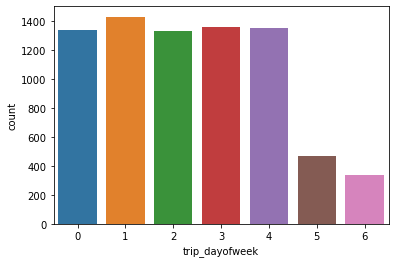

In [36]:
sns.countplot(x= 'trip_dayofweek' , data=citi[citi['end station name']== 'Pershing Square North'])

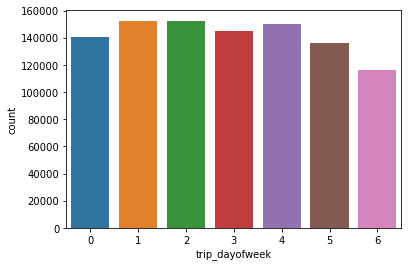

In [37]:
#day of the week could be helpful to the model
sns.countplot(x= 'trip_dayofweek' , data=citi[citi['end station name']!= 'Pershing Square North'])

In [38]:
citi[citi['end station name']== 'E 17 St & Broadway']['trip_dayofweek'].mean()

2.868652891238187

In [39]:
citi[citi['end station name']!= 'E 17 St & Broadway']['trip_dayofweek'].mean()

2.8880365644179187

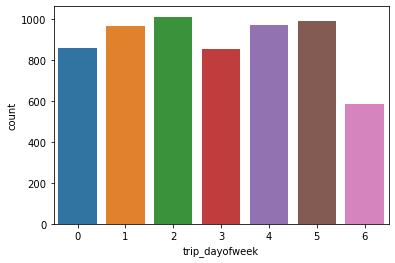

In [40]:
sns.countplot(x= 'trip_dayofweek' , data=citi[citi['end station name']== 'E 17 St & Broadway'])

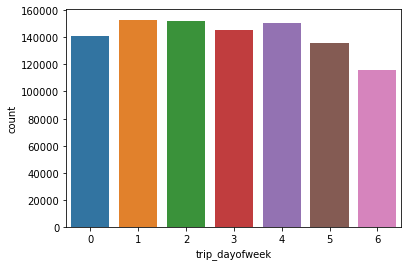

In [41]:
sns.countplot(x= 'trip_dayofweek' , data=citi[citi['end station name']!= 'E 17 St & Broadway'])

In [42]:
citi[citi['end station name']== 'Broadway & E 22 St']['trip_dayofweek'].mean()

2.5432555014278515

In [43]:
citi[citi['end station name']!= 'Broadway & E 22 St']['trip_dayofweek'].mean()

2.889979608528001

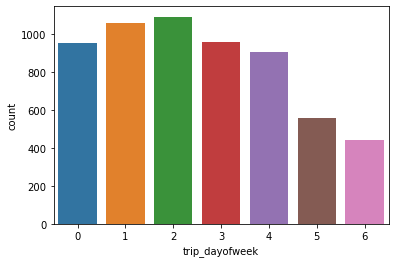

In [44]:
sns.countplot(x= 'trip_dayofweek' , data=citi[citi['end station name']== 'Broadway & E 22 St'])

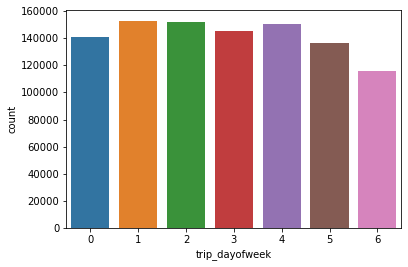

In [45]:
sns.countplot(x= 'trip_dayofweek' , data=citi[citi['end station name']!= 'Broadway & E 22 St'])

In [46]:
#8 Ave & W 31 St

In [47]:
citi[citi['end station name']== '8 Ave & W 31 St']['trip_dayofweek'].mean()

2.459816207184628

In [48]:
citi[citi['end station name']!= '8 Ave & W 31 St']['trip_dayofweek'].mean()

2.89049316355654

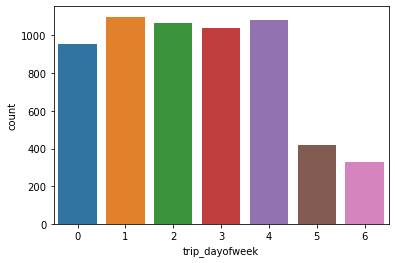

In [49]:
sns.countplot(x= 'trip_dayofweek' , data=citi[citi['end station name']== '8 Ave & W 31 St'])

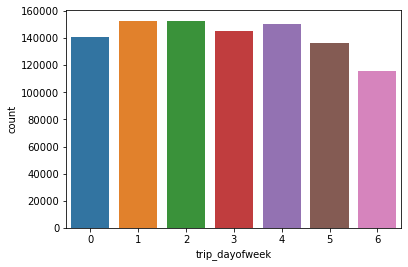

In [50]:
sns.countplot(x= 'trip_dayofweek' , data=citi[citi['end station name']!= '8 Ave & W 31 St'])

In [51]:
#Broadway & E 14 St

In [52]:
citi[citi['end station name']== 'Broadway & E 14 St']['trip_dayofweek'].mean()

2.9194545454545455

In [53]:
citi[citi['end station name']!= 'Broadway & E 14 St']['trip_dayofweek'].mean()

2.88774112716391

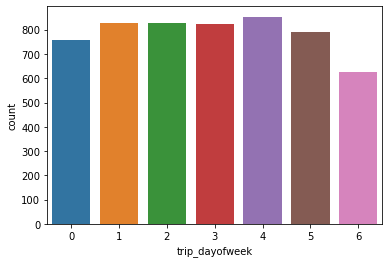

In [54]:
sns.countplot(x= 'trip_dayofweek' , data=citi[citi['end station name']== 'Broadway & E 14 St'])

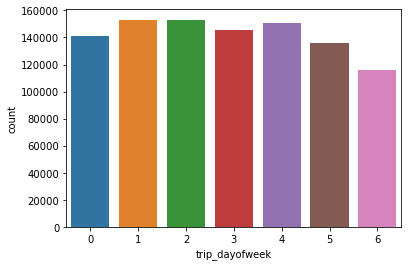

In [55]:
sns.countplot(x= 'trip_dayofweek' , data=citi[citi['end station name']!= 'Broadway & E 14 St'])

# Popular Station EDA

In [56]:
def popular_station(row):
    #if row [row['end station id'].isin([519,497,402,3255,285,426,435,514]) == True:
    if row ['end station id']== 519:
      return 1
    elif row ['end station id']== 497:
        return 1
    elif row ['end station id']== 402:
        return 1
    elif row ['end station id']== 3255:
        return 1
    elif row ['end station id']== 285:
        return 1
    elif row ['end station id']== 426:
        return 1
    elif row ['end station id']== 435:
        return 1
    elif row ['end station id']== 514:
        return 1
    else:
      return 0

citi['popular_station_bool'] = citi.apply (lambda row: popular_station(row), axis=1)

In [57]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999996 entries, 0 to 999995
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   tripduration             999996 non-null  int64         
 1   starttime                999996 non-null  datetime64[ns]
 2   stoptime                 999996 non-null  datetime64[ns]
 3   start station id         999996 non-null  float64       
 4   start station name       999996 non-null  object        
 5   start station latitude   999996 non-null  float64       
 6   start station longitude  999996 non-null  float64       
 7   end station id           999996 non-null  float64       
 8   end station name         999996 non-null  object        
 9   end station latitude     999996 non-null  float64       
 10  end station longitude    999996 non-null  float64       
 11  bikeid                   999996 non-null  int64         
 12  usertype        

In [58]:
citi['popular_station_bool'].value_counts()

0    952678
1     47318
Name: popular_station_bool, dtype: int64

In [59]:
citi['popular_station_bool'].value_counts(normalize= True)

0    0.952682
1    0.047318
Name: popular_station_bool, dtype: float64

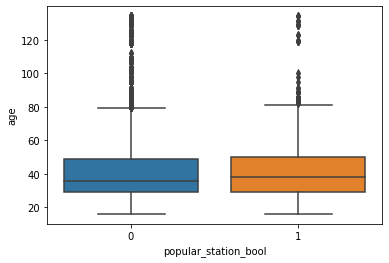

In [60]:
ax = sns.boxplot(x = 'popular_station_bool', y = 'age', data = citi)
ax

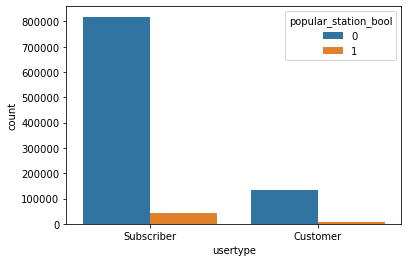

In [61]:
ax= sns.countplot(x='usertype', hue='popular_station_bool', data=citi)

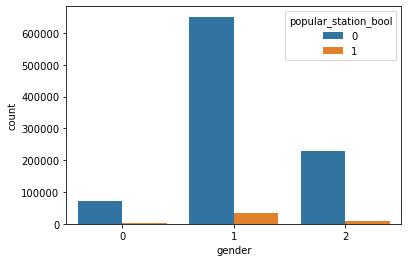

In [62]:
ax= sns.countplot(x='gender', hue='popular_station_bool', data=citi)

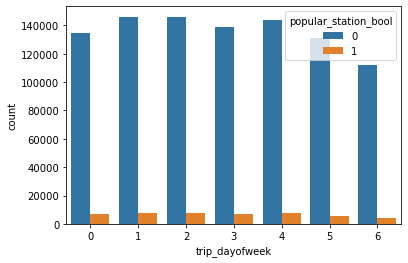

In [63]:
ax= sns.countplot(x='trip_dayofweek', hue='popular_station_bool', data=citi)

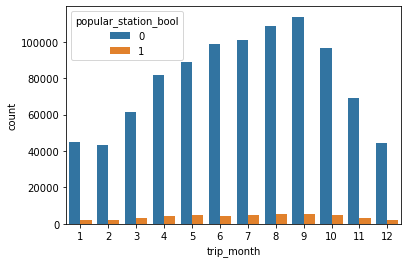

In [64]:
ax= sns.countplot(x='trip_month', hue='popular_station_bool', data=citi)

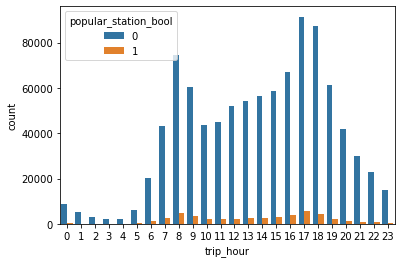

In [65]:
ax= sns.countplot(x='trip_hour', hue='popular_station_bool', data=citi)

# Model

In [66]:
citi.rename(columns = {'start station id': 'start_station_id'}, inplace=True)

In [67]:
X= citi[['gender','trip_hour', 'usertype', 'start_station_id']]

In [68]:
y= citi[['popular_station_bool']]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [70]:
citi_train = pd.concat([X_train, y_train], axis = 1)
citi_train

,gender,trip_hour,usertype,start_station_id,popular_station_bool
859549,1,18,Subscriber,3110.0,0
511502,1,17,Subscriber,3002.0,0
902116,1,18,Subscriber,3108.0,0
371337,1,9,Subscriber,492.0,0
372754,2,20,Subscriber,3656.0,0
...,...,...,...,...,...
605427,1,18,Subscriber,2002.0,0
392350,1,9,Subscriber,295.0,0
353542,1,14,Subscriber,493.0,0
19890,2,21,Subscriber,438.0,0


In [71]:
citi_test = pd.concat([X_test, y_test], axis = 1)
citi_test

,gender,trip_hour,usertype,start_station_id,popular_station_bool
88026,1,9,Subscriber,3311.0,0
909725,1,17,Subscriber,3142.0,0
69988,1,10,Subscriber,3125.0,0
25680,1,18,Subscriber,3117.0,0
220865,0,14,Customer,501.0,0
...,...,...,...,...,...
169689,1,7,Subscriber,530.0,0
185996,1,8,Subscriber,519.0,0
499139,1,19,Customer,3427.0,0
270961,2,6,Subscriber,3160.0,0


In [73]:
formula = 'popular_station_bool ~ gender + usertype + C(trip_hour) + C(start_station_id)' 
fitted_model = smf.logit(formula=formula, data=citi_train, missing='drop').fit()


fitted_model.summary()

KeyboardInterrupt: 

In [ ]:
y_pred_test = np.round(fitted_model.predict(citi_test))
y_pred_test

In [ ]:
#wrong? i did something wrong but i dont know what... it predicted everything will be 0....?
pd.crosstab(citi_test['popular_station_bool'], y_pred_test)

In [ ]:
confusion_matrix(citi_test['popular_station_bool'], y_pred_test)

In [ ]:
#what stations are most popular and what time of day

In [ ]:
#what times of day are the most rides/ rides by month

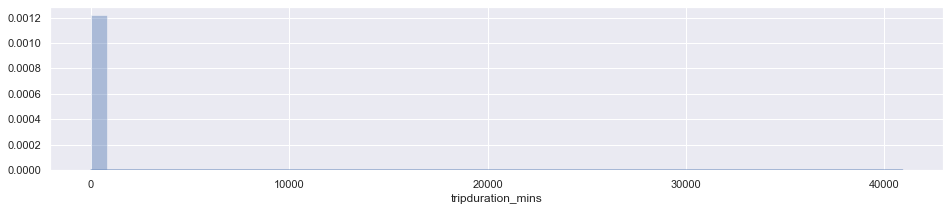

In [74]:
sns.set(rc={'figure.figsize': (16,3)})
ax = sns.distplot(citi['tripduration_mins'])

In [75]:
#how many trips are over 3 hours
len(citi.loc[citi['tripduration_mins']>180])

1584

In [76]:
len(citi)

999996

In [ ]:
#how much data am i dropping? 
len(citi.loc[citi['tripduration_mins']>180]) / len(citi)

In [ ]:
#dropped all records of trips over 3 hours
citi= citi.loc[citi['tripduration_mins']<=180]

In [77]:
#male/female ratio... drop unknowns or no?
#there are a lot more men who use citibike than women
citi['gender'].value_counts(normalize=True)

1    0.684717
2    0.239278
0    0.076005
Name: gender, dtype: float64

In [ ]:
len(citi)

In [ ]:
len(citi['gender'])

In [ ]:
citi['gender'].sum()

In [ ]:
683800 / len(citi) * 100

In [ ]:
239952 / len(citi) * 100

In [ ]:
74595 / len(citi) * 100

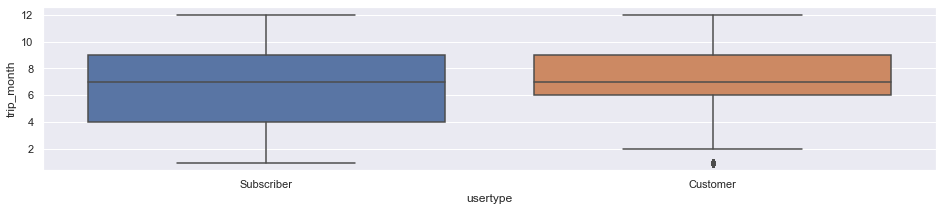

In [79]:
ax = sns.boxplot(x = 'usertype', y = 'trip_month', data = citi)
ax

In [80]:
#subs v users breakdown
citi['usertype'].value_counts()

Subscriber    860579
Customer      139417
Name: usertype, dtype: int64

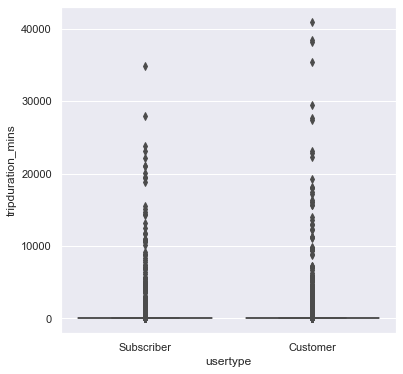

In [82]:
#sns.set(rc={'figure.figsize': (6, 6)})
ax = sns.boxplot(x = 'usertype', y = 'tripduration_mins', data = citi)
ax


In [83]:
citi.groupby("usertype")["tripduration_mins"].median()
#user type has some effect on trip duration. 
#check if subscribesrs have longer trips than customers in big df because current pricing structure 
#incentivizes longer trips for subscribers

#maybe there is a way to change pricing/make it more dynamic
#


usertype
Customer      19.966667
Subscriber     9.316667
Name: tripduration_mins, dtype: float64

In [84]:
citi.groupby("usertype")["tripduration_mins"].mean()


usertype
Customer      34.338886
Subscriber    13.326611
Name: tripduration_mins, dtype: float64

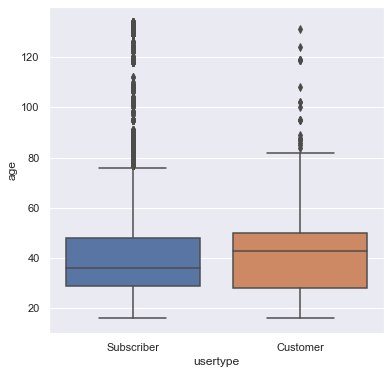

In [85]:
sns.set(rc={'figure.figsize': (6, 6)})
ax = sns.boxplot(x = 'usertype', y = 'age', data = citi)
ax
#subscribers skew younger than customers

In [86]:
#not a major difference between user type and ages
citi.groupby("usertype")["age"].median()


usertype
Customer      43
Subscriber    36
Name: age, dtype: int64

In [90]:
#not a big difference
citi.groupby("usertype")["age"].mean()


usertype
Customer      39.359067
Subscriber    38.718989
Name: age, dtype: float64

In [87]:
citi.tripduration_mins.mean()

16.256091024364093

In [88]:
citi.tripduration_mins.min()

1.0166666666666666

In [89]:
citi.tripduration_mins.max()

40939.71666666667

In [ ]:
citi.info()

In [ ]:
citi['age'].max()
#how to cut out bogus ages?

In [ ]:
citi['age'].min()

In [ ]:
citi['age'].median()

In [ ]:
citi['age'].mean()

In [91]:
#taking out ages over 80 (a check of my work)
len(citi.loc[citi['age']>80])

1250

In [92]:
#actually reassigning the database 
citi= citi.loc[citi['age']<=80]

In [93]:
citi['age'].value_counts()

50    83505
29    41554
30    41474
28    39516
27    38952
      ...  
75      427
76      421
78      336
79      238
80      107
Name: age, Length: 65, dtype: int64

In [ ]:
citi['age'].max()

In [ ]:
citi['age'].min()

In [ ]:
citi['age'].mean()

In [ ]:
citi['age'].median()

In [94]:
age_count= citi['age'].value_counts()

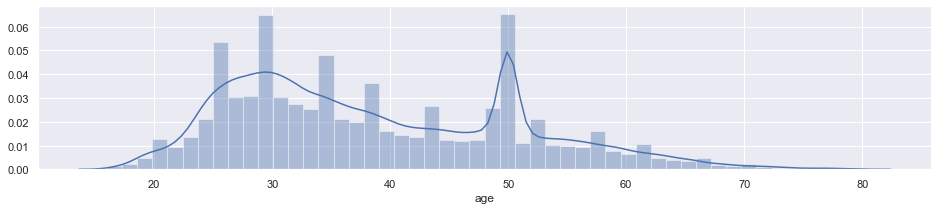

In [95]:
#ax = sns.distplot(aug20, x='age') this didn't work!!!
sns.set(rc={'figure.figsize': (16,3)})
ax = sns.distplot(citi['age'])


In [ ]:
citi.info()

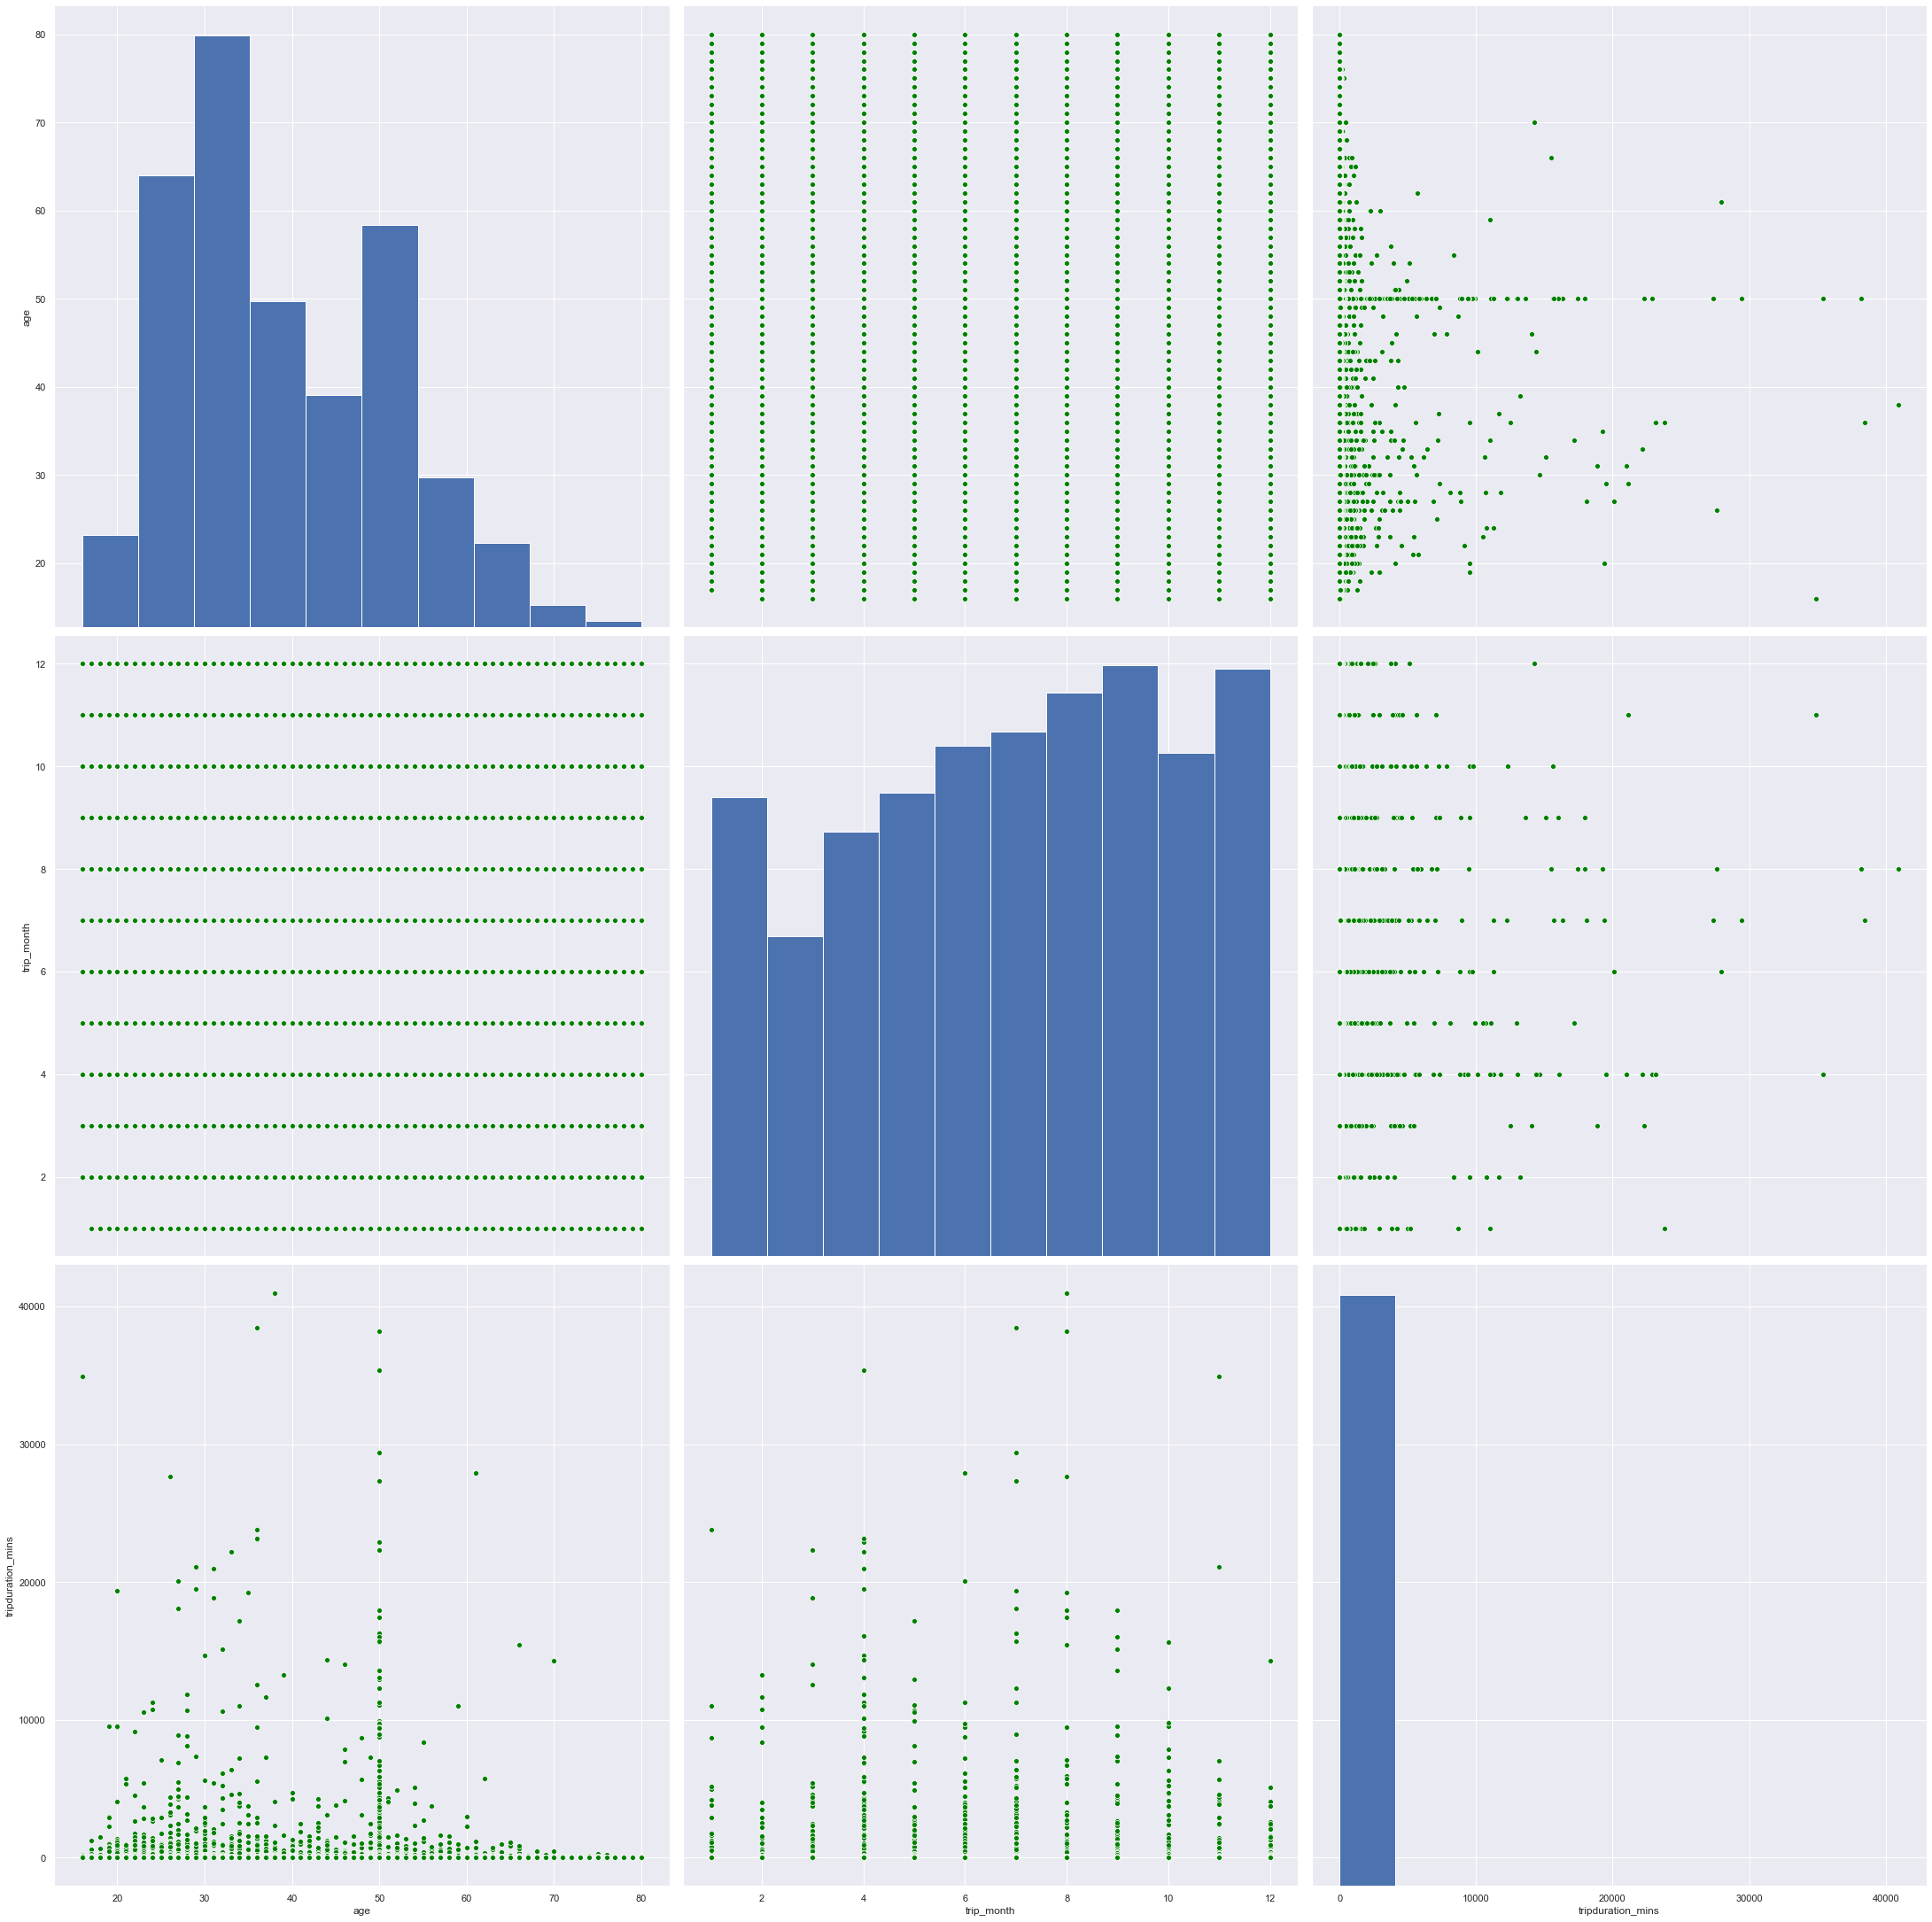

In [96]:
sns.pairplot(citi[['age','trip_month','tripduration_mins']], plot_kws = {"color": "green"}, height = 10)

In [ ]:
#USELESS
sns.set(rc={'figure.figsize': (16, 5)})
ax = sns.scatterplot(x = 'age', y = 'tripduration_mins', data = citi,
                 palette ='plasma_r', ci = False)

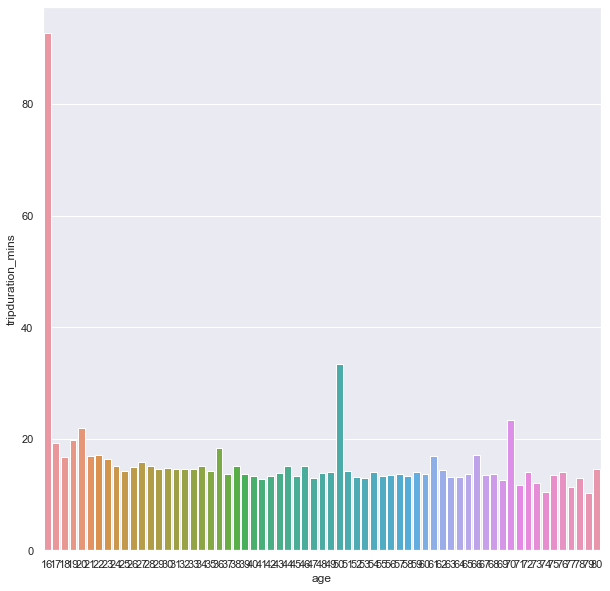

In [98]:
sns.set(rc={'figure.figsize': (10, 10)})
ax = sns.barplot(x = 'age', y = 'tripduration_mins', data = citi, ci = False)


In [ ]:
citi.info()

In [ ]:
citi.describe()

In [ ]:
# Creating new df w/ only the numerical vars
num_df = citi[['tripduration_mins', 'start_station_id',
                  'end station id', 'gender', 'trip_dayofweek',
                  'trip_month', 'trip_hour', 'age', 
                   'popular_station_bool']]
num_df

In [ ]:
plt.matshow(num_df.corr())

f = plt.figure(figsize=(19, 15))
plt.matshow(num_df.corr(), fignum=f.number)
plt.xticks(range(num_df.shape[1]), num_df.columns, fontsize=14, rotation=45)
plt.yticks(range(num_df.shape[1]), num_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')

plt.show()

In [99]:
popular_df = citi.loc[citi['popular_station_bool']== 1]

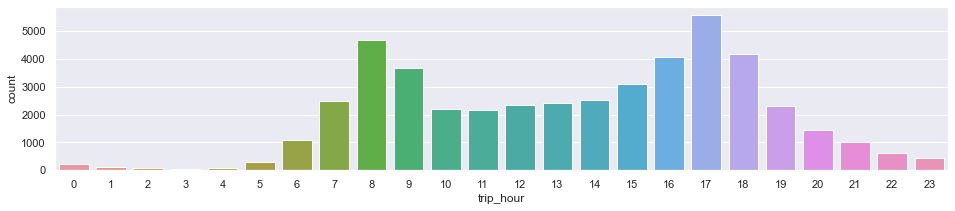

In [100]:
sns.set(rc={'figure.figsize': (16,3)})
ax= sns.countplot(x='trip_hour', data=popular_df)

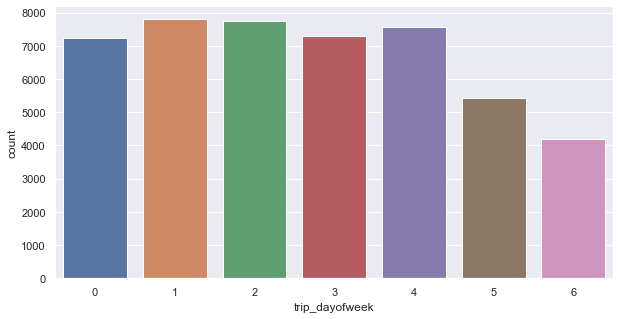

In [101]:
sns.set(rc={'figure.figsize': (10,5)})
ax= sns.countplot(x='trip_dayofweek', data=popular_df)

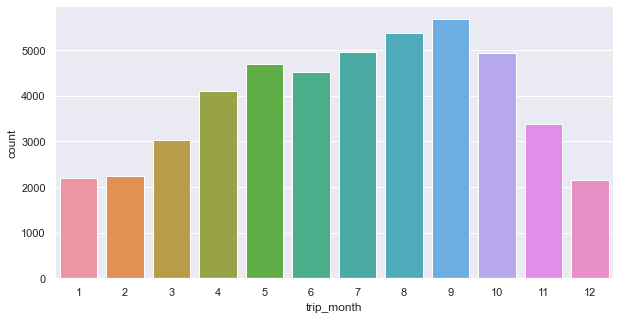

In [102]:
sns.set(rc={'figure.figsize': (10,5)})
ax= sns.countplot(x='trip_month', data=popular_df)

In [ ]:
citi.info()

In [ ]:
sortby departure time stamps

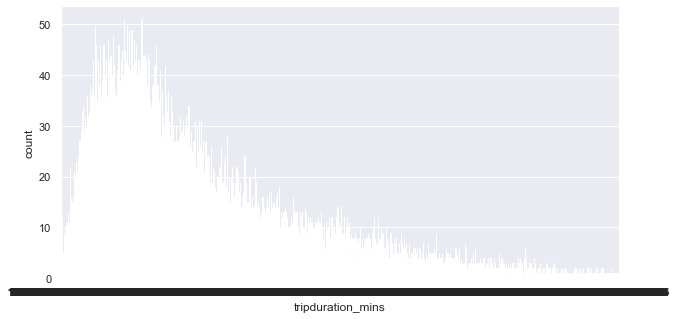

In [103]:
sns.countplot(x= 'tripduration_mins' , data=citi[citi['age']== 25])